In [1]:
# import relevant libraries
import requests
import pandas as pd
import numpy as np
import math
import json

In [5]:
# set API request parameters
api_server = 'https://platform-api.opentargets.io/v3/platform/'
api_endpoint = 'public/evidence/filter'
size = '10000'
drug_evidence_parameters = 'datasource=chembl&fields=disease.efo_info&fields=drug&fields=evidence&fields=target&fields=access_level'
disease_efo_id = 'EFO_0003086'
disease_label = 'kidney disease'

In [6]:
# construct API request URL using parameters
api_request_url = (api_server + 
       api_endpoint + 
       '?size=' + size +
       '&' + drug_evidence_parameters +
       '&disease=' + disease_efo_id 
) 

In [7]:
# use requests library to call Open Targets API and transform response in JSON
api_response = requests.get(api_request_url).json()
all_drugs_data = api_response['data']
print(len(all_drugs_data))

7304


In [5]:
trials_data = [item['evidence']['drug2clinic'] for item in all_drugs_data]

In [8]:
from pandas.io.json import json_normalize
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 100
drugs_data_df = pd.DataFrame.from_dict(json_normalize(all_drugs_data), orient='columns')

In [9]:
drugs_data_df.head(2)

,access_level,disease.efo_info.efo_id,disease.efo_info.label,disease.efo_info.path,disease.efo_info.therapeutic_area.codes,disease.efo_info.therapeutic_area.labels,drug.id,drug.molecule_name,drug.molecule_type,evidence.drug2clinic.clinical_trial_phase.label,evidence.drug2clinic.clinical_trial_phase.numeric_index,evidence.drug2clinic.date_asserted,evidence.drug2clinic.evidence_codes,evidence.drug2clinic.is_associated,evidence.drug2clinic.provenance_type.expert.status,evidence.drug2clinic.resource_score.type,evidence.drug2clinic.resource_score.value,evidence.drug2clinic.status,evidence.drug2clinic.urls,evidence.evidence_codes,evidence.evidence_codes_info,evidence.target2drug.action_type,evidence.target2drug.date_asserted,evidence.target2drug.evidence_codes,evidence.target2drug.is_associated,evidence.target2drug.mechanism_of_action,evidence.target2drug.provenance_type.database.id,evidence.target2drug.provenance_type.database.version,evidence.target2drug.provenance_type.expert.status,evidence.target2drug.provenance_type.literature.references,evidence.target2drug.resource_score.type,evidence.target2drug.resource_score.value,evidence.target2drug.urls,target.activity,target.binding_subunit_known,target.complex_id,target.gene_info.geneid,target.gene_info.name,target.gene_info.symbol,target.id,target.target_class,target.target_name,target.target_type
0,public,http://www.ebi.ac.uk/efo/EFO_0004194,IGA glomerulonephritis,"[[EFO_0003086, EFO_0004194]]",[EFO_0003086],[kidney disease],http://identifiers.org/chembl.compound/CHEMBL1069,VALSARTAN,Small molecule,Phase IV,4,2013-08-27T00:00:00.000Z,"[http://purl.obolibrary.org/obo/ECO_0000205, http://identifiers.org/eco/drug_disease]",True,True,probability,1.0,Completed,"[{'url': 'https://clinicaltrials.gov/search?id=%22NCT00426348%22', 'nice_name': 'Clinical Trials...","[drug_disease, target_drug, ECO_0000205]","[[{'eco_id': 'drug_disease', 'label': 'drug-disease evidence'}], [{'eco_id': 'target_drug', 'lab...",ANTAGONIST,2015-01-14T00:00:00.000Z,"[http://purl.obolibrary.org/obo/ECO_0000205, http://identifiers.org/eco/target_drug, http://purl...",True,Type-1 angiotensin II receptor antagonist,ChEMBL,25,True,NaN,probability,1,"[{'url': 'https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL1069', 'nice_name': 'ChEMBL molecu...",negative_modulator,NaN,NaN,ENSG00000144891,angiotensin II receptor type 1,AGTR1,ENSG00000144891,[Angiotensin receptor],Type-1 angiotensin II receptor,single_protein
1,public,http://www.ebi.ac.uk/efo/EFO_0003086,kidney disease,[[EFO_0003086]],[EFO_0003086],[kidney disease],http://identifiers.org/chembl.compound/CHEMBL1456,MYCOPHENOLATE MOFETIL,Small molecule,Phase IV,4,2011-12-06T00:00:00.000Z,"[http://purl.obolibrary.org/obo/ECO_0000205, http://identifiers.org/eco/drug_disease]",True,True,probability,1.0,Completed,"[{'url': 'https://clinicaltrials.gov/search?id=%22NCT00275535%22', 'nice_name': 'Clinical Trials...","[drug_disease, target_drug, ECO_0000205]","[[{'eco_id': 'drug_disease', 'label': 'drug-disease evidence'}], [{'eco_id': 'target_drug', 'lab...",INHIBITOR,2015-01-14T00:00:00.000Z,"[http://purl.obolibrary.org/obo/ECO_0000205, http://identifiers.org/eco/target_drug, http://purl...",True,Inosine-5'-monophosphate dehydrogenase (IMPDH) inhibitor,ChEMBL,25,True,"[{'lit_id': 'http://europepmc.org/abstract/MED/15621150'}, {'lit_id': 'http://europepmc.org/abst...",probability,1,"[{'url': 'https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL1456', 'nice_name': 'ChEMBL molecu...",negative_modulator,False,CHEMBL2111369,ENSG00000106348,inosine monophosphate dehydrogenase 1,IMPDH1,ENSG00000106348,[Oxidoreductase],Inosine-5'-monophosphate dehydrogenase (IMPDH),protein_family


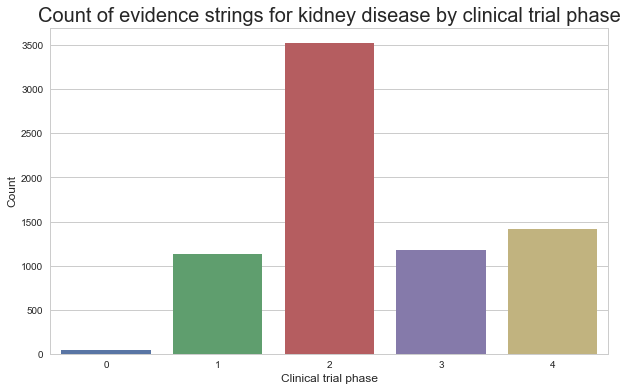

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='whitegrid')
fig = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='evidence.drug2clinic.clinical_trial_phase.numeric_index', data=drugs_data_df)
plt.title('Count of evidence strings for ' + disease_label + ' by clinical trial phase', fontsize=20)
plt.xlabel('Clinical trial phase', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [64]:
duplicate_columns = ['disease.efo_info.label',
                     'drug.molecule_name']
duplicates_df = drugs_data_df.pivot_table(values=duplicate_columns,
                                          index='evidence.drug2clinic.clinical_trial_phase.numeric_index',
                                          columns='evidence.drug2clinic.status',
                                          fill_value=0,
                                          aggfunc='size')

In [65]:
duplicates_df

evidence.drug2clinic.status,"Active, not recruiting",Completed,Enrolling by invitation,Not yet recruiting,Recruiting,Suspended,Terminated,Unknown status,Withdrawn
evidence.drug2clinic.clinical_trial_phase.numeric_index,,,,,,,,,
0,14,28,0,0,2,0,1,2,0
1,128,636,0,9,95,3,170,88,3
2,451,1602,0,29,415,0,527,408,92
3,185,591,0,130,107,0,74,75,20
4,30,431,4,32,139,0,89,107,14


In [ ]:
# next steps

# run aggregation for diabetes mellitus
# make count plot 
# make count plot broken down by phases
# focus on phase IV - make count plot broken down by phase with unaggregated data
# focus on phase IV - make count plot broken down by phase with aggregated data

In [11]:
cols_to_group = [
    'disease.efo_info.label',
    'drug.molecule_name',
    'evidence.drug2clinic.clinical_trial_phase.numeric_index',
    'evidence.drug2clinic.status'
]

drugs_data_df_no_dups = drugs_data_df.groupby(cols_to_group).size().reset_index(name='count')

In [12]:
drugs_data_df_no_dups.head(2)

,disease.efo_info.label,drug.molecule_name,evidence.drug2clinic.clinical_trial_phase.numeric_index,evidence.drug2clinic.status,count
0,Alport syndrome,BARDOXOLONE METHYL,2,"Active, not recruiting",4
1,Alport syndrome,BENAZEPRIL,2,Completed,1


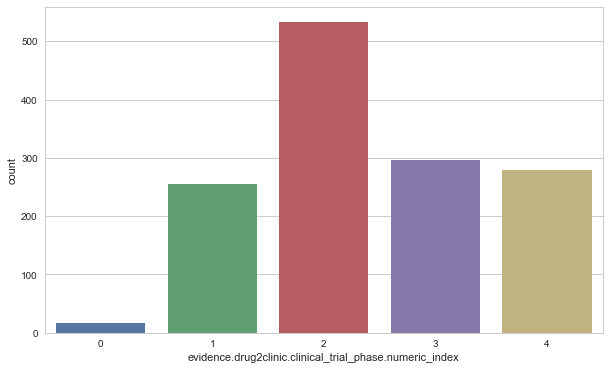

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='whitegrid')
fig = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='evidence.drug2clinic.clinical_trial_phase.numeric_index', data=drugs_data_df_no_dups)

In [26]:
new_df = drugs_data_df['evidence.drug2clinic.clinical_trial_phase.numeric_index'].value_counts().rename_axis('trial_phase').reset_index(name='counts_not_aggregated')

In [27]:
new_df.head()

,trial_phase,counts_not_aggregated
0,2,3524
1,4,1419
2,3,1182
3,1,1132
4,0,47


In [28]:
new_df_2 = drugs_data_df_no_dups['evidence.drug2clinic.clinical_trial_phase.numeric_index'].value_counts().rename_axis('trial_phase').reset_index(name='counts_aggregated')

In [29]:
new_df_2.head()

,trial_phase,counts_aggregated
0,2,533
1,3,296
2,4,280
3,1,255
4,0,16


In [30]:
test_df = pd.merge(new_df, new_df_2, on='trial_phase', how='outer')

In [31]:
test_df.head()

,trial_phase,counts_not_aggregated,counts_aggregated
0,2,3524,533
1,4,1419,280
2,3,1182,296
3,1,1132,255
4,0,47,16


In [44]:
melt_df = pd.melt(test_df, id_vars='trial_phase', value_vars=['counts_not_aggregated', 'counts_aggregated'])

In [46]:
melt_df

,trial_phase,variable,value
0,2,counts_not_aggregated,3524
1,4,counts_not_aggregated,1419
2,3,counts_not_aggregated,1182
3,1,counts_not_aggregated,1132
4,0,counts_not_aggregated,47
5,2,counts_aggregated,533
6,4,counts_aggregated,280
7,3,counts_aggregated,296
8,1,counts_aggregated,255
9,0,counts_aggregated,16


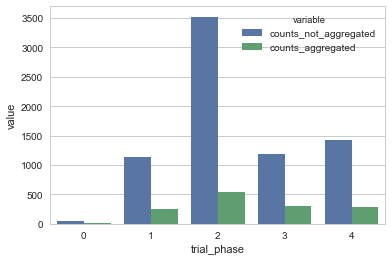

In [51]:
sns.barplot(data=melt_df, x='trial_phase', y='value', hue='variable')

In [52]:
## explore phase 2 data

In [53]:
drugs_data_df_phase_2 = drugs_data_df.loc[drugs_data_df['evidence.drug2clinic.clinical_trial_phase.numeric_index'] == 2]

In [54]:
print(len(drugs_data_df_phase_2))

3524


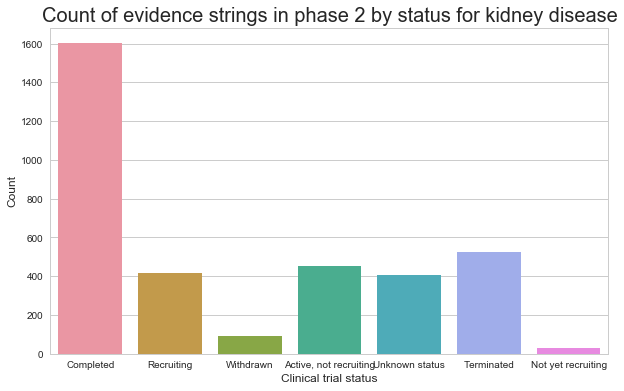

In [56]:
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='evidence.drug2clinic.status',
                   data=drugs_data_df_phase_2)
plt.title('Count of evidence strings in phase 2 by status for ' + disease_label, fontsize=20)
plt.xlabel('Clinical trial status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [57]:
new_ph2_df = drugs_data_df_phase_2['evidence.drug2clinic.status'].value_counts().rename_axis('trial_status').reset_index(name='counts_not_aggregated')
new_ph2_df

,trial_status,counts_not_aggregated
0,Completed,1602
1,Terminated,527
2,"Active, not recruiting",451
3,Recruiting,415
4,Unknown status,408
5,Withdrawn,92
6,Not yet recruiting,29


In [61]:
cols_to_group = [
    'disease.efo_info.label',
    'drug.molecule_name',
    'evidence.drug2clinic.clinical_trial_phase.numeric_index',
    'evidence.drug2clinic.status'
]

drugs_data_df_ph2_no_dups = drugs_data_df_phase_2.groupby(cols_to_group).size().reset_index(name='count')

In [65]:
new_ph2_df_2 = drugs_data_df_ph2_no_dups['evidence.drug2clinic.status'].value_counts().rename_axis('trial_status').reset_index(name='counts_aggregated')
new_ph2_df_2

,trial_status,counts_aggregated
0,Completed,232
1,Terminated,77
2,Recruiting,67
3,"Active, not recruiting",64
4,Unknown status,57
5,Withdrawn,25
6,Not yet recruiting,11


In [66]:
test_df_2 = pd.merge(new_ph2_df, new_ph2_df_2, on='trial_status', how='outer')
test_df_2

,trial_status,counts_not_aggregated,counts_aggregated
0,Completed,1602,232
1,Terminated,527,77
2,"Active, not recruiting",451,64
3,Recruiting,415,67
4,Unknown status,408,57
5,Withdrawn,92,25
6,Not yet recruiting,29,11


In [67]:
melt_df_2 = pd.melt(test_df_2, id_vars='trial_status', value_vars=['counts_not_aggregated', 'counts_aggregated'])

In [68]:
melt_df_2.head(10)

,trial_status,variable,value
0,Completed,counts_not_aggregated,1602
1,Terminated,counts_not_aggregated,527
2,"Active, not recruiting",counts_not_aggregated,451
3,Recruiting,counts_not_aggregated,415
4,Unknown status,counts_not_aggregated,408
5,Withdrawn,counts_not_aggregated,92
6,Not yet recruiting,counts_not_aggregated,29
7,Completed,counts_aggregated,232
8,Terminated,counts_aggregated,77
9,"Active, not recruiting",counts_aggregated,64


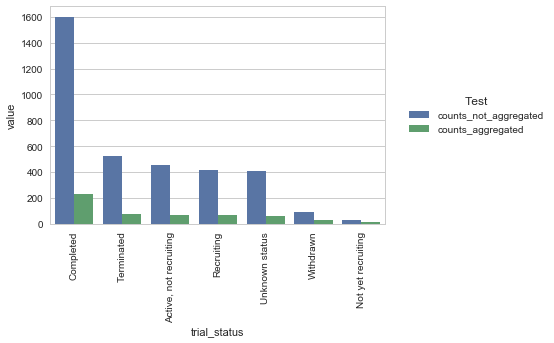

In [84]:
ax = sns.barplot(data=melt_df_2, x='trial_status', y='value', hue='variable')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(loc='center right', bbox_to_anchor=(1.50, 0.5), ncol=1)
leg = ax.get_legend()
leg.set_title("Test")
plt.show()